# kNN classifier tutorial



## 1 Data Exploration

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [133]:
df = pd.read_csv(fr"data\breast-cancer-wisconsin.data.txt", header = None)

In [134]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

In [135]:
df.describe()

,0,1,2,3,4,5,7,8,9,10
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [136]:
col_names = ['Id', 'Clump_thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape', 'Marginal_Adhesion', 
             'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class']

df.columns = col_names

In [137]:
df.head()

,Id,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


Drop redundant columns¶
We should drop any redundant columns from the dataset which does not have any predictive power. Here, Id is the redundant column. So, I will drop it first.

In [138]:
df.drop("Id", axis = 1, inplace = True) # inplace is a param that decides whether we change the original dataset or create a new copy
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump_thickness              699 non-null    int64 
 1   Uniformity_Cell_Size         699 non-null    int64 
 2   Uniformity_Cell_Shape        699 non-null    int64 
 3   Marginal_Adhesion            699 non-null    int64 
 4   Single_Epithelial_Cell_Size  699 non-null    int64 
 5   Bare_Nuclei                  699 non-null    object
 6   Bland_Chromatin              699 non-null    int64 
 7   Normal_Nucleoli              699 non-null    int64 
 8   Mitoses                      699 non-null    int64 
 9   Class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


We can see that there are 9 numerical variables and 1 categorical variable in the dataset. I will check the frequency distribution of values in the variables to confirm the same.


In [139]:
for n in df.columns:
    print(df[n].value_counts())

1     145
5     130
3     108
4      80
10     69
2      50
8      46
6      34
7      23
9      14
Name: Clump_thickness, dtype: int64
1     384
10     67
3      52
2      45
4      40
5      30
8      29
6      27
7      19
9       6
Name: Uniformity_Cell_Size, dtype: int64
1     353
2      59
10     58
3      56
4      44
5      34
6      30
7      30
8      28
9       7
Name: Uniformity_Cell_Shape, dtype: int64
1     407
3      58
2      58
10     55
4      33
8      25
5      23
6      22
7      13
9       5
Name: Marginal_Adhesion, dtype: int64
2     386
3      72
4      48
1      47
6      41
5      39
10     31
8      21
7      12
9       2
Name: Single_Epithelial_Cell_Size, dtype: int64
1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare_Nuclei, dtype: int64
2     166
3     165
1     152
7      73
4      40
5      34
8      28
10     20
9      11
6      10
Name: Bland_Chromatin, dtype: int64
1     443
10     

The distribution of values shows that data type of Bare_Nuclei is of type integer. But the summary of the dataframe shows that it is type object. So, I will explicitly convert its data type to integer.




In [140]:
df["Bare_Nuclei"] = pd.to_numeric(df["Bare_Nuclei"], errors = "coerce") # errors handles how to act if we meet non convertable value, coerce - anyways try to convert
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump_thickness              699 non-null    int64  
 1   Uniformity_Cell_Size         699 non-null    int64  
 2   Uniformity_Cell_Shape        699 non-null    int64  
 3   Marginal_Adhesion            699 non-null    int64  
 4   Single_Epithelial_Cell_Size  699 non-null    int64  
 5   Bare_Nuclei                  683 non-null    float64
 6   Bland_Chromatin              699 non-null    int64  
 7   Normal_Nucleoli              699 non-null    int64  
 8   Mitoses                      699 non-null    int64  
 9   Class                        699 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 54.7 KB


Explore problems within variables¶
Now, I will explore problems within variables.

In [141]:
df.isnull().sum()

Clump_thickness                 0
Uniformity_Cell_Size            0
Uniformity_Cell_Shape           0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    16
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

We can see that the Bare_Nuclei column contains missing values. We need to dig deeper to find the frequency distribution of values of Bare_Nuclei.

In [142]:
# check frequency distribution of `Bare_Nuclei` column
df["Bare_Nuclei"].value_counts()

1.0     402
10.0    132
2.0      30
5.0      30
3.0      28
8.0      21
4.0      19
9.0       9
7.0       8
6.0       4
Name: Bare_Nuclei, dtype: int64

In [143]:
# view frequency distribution of values in `Class` variable

df['Class'].value_counts(normalize=True)


2    0.655222
4    0.344778
Name: Class, dtype: float64

In [144]:
# view summary statistics in numerical variables

print(round(df.describe(), 2))

       Clump_thickness  Uniformity_Cell_Size  Uniformity_Cell_Shape  \
count           699.00                699.00                 699.00   
mean              4.42                  3.13                   3.21   
std               2.82                  3.05                   2.97   
min               1.00                  1.00                   1.00   
25%               2.00                  1.00                   1.00   
50%               4.00                  1.00                   1.00   
75%               6.00                  5.00                   5.00   
max              10.00                 10.00                  10.00   

       Marginal_Adhesion  Single_Epithelial_Cell_Size  Bare_Nuclei  \
count             699.00                       699.00       683.00   
mean                2.81                         3.22         3.54   
std                 2.86                         2.21         3.64   
min                 1.00                         1.00         1.00   
25%       

kNN algorithm is robust to outliers.

## 2. Data Visualization

Now, we have a basic understanding of our data. I will supplement it with some data visualization to get better understanding of our data.
Univariate plots are plots that analyse one variable (trait) at a time.

Check the distribution of variables. Now, I will plot the histograms to check variable distributions to find out if they are normal or skewed.

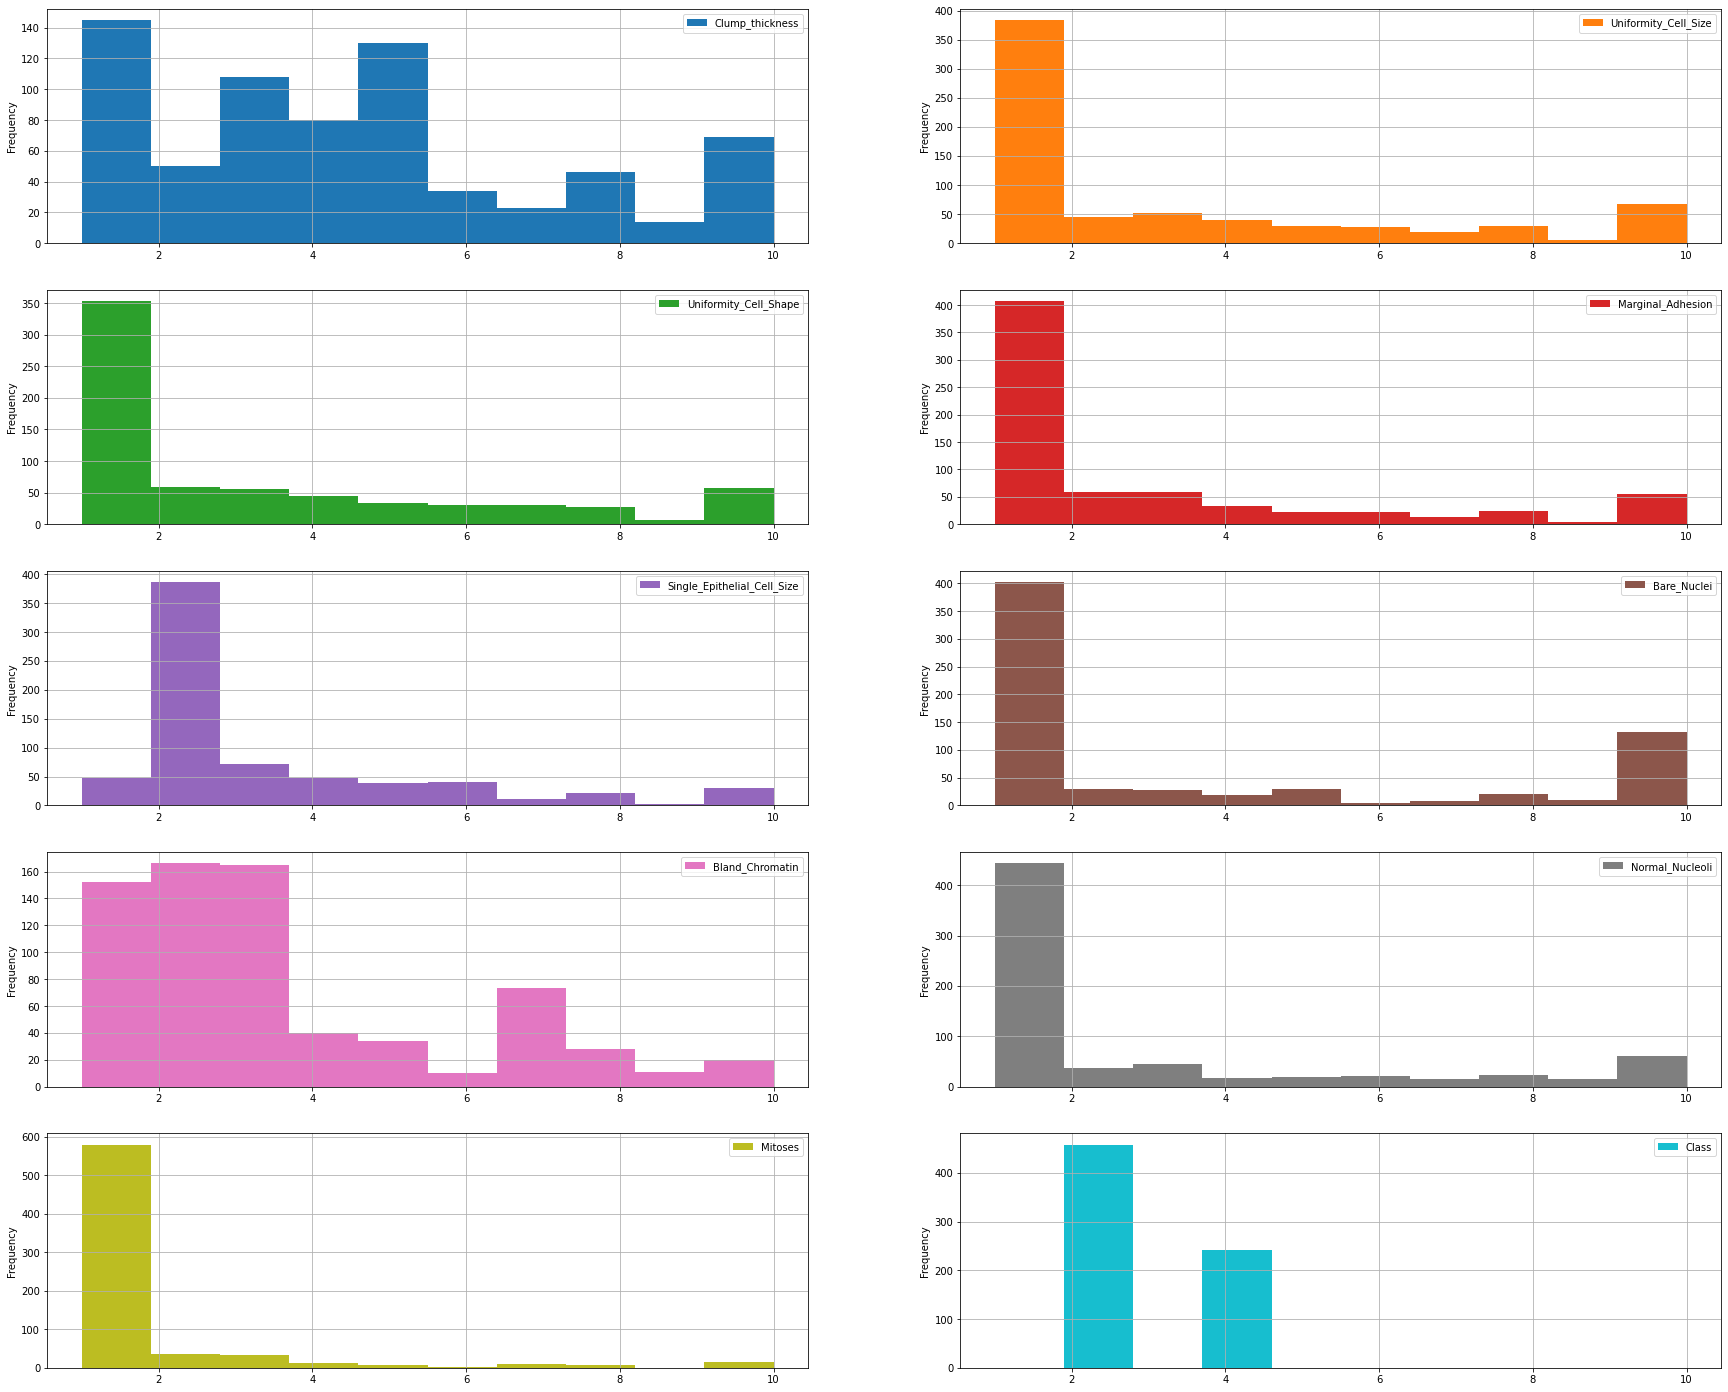

In [145]:
# plot histograms of the variables

plt.rcParams["figure.figsize"] = (30,25)
df.plot(kind = "hist", bins = 10, subplots = True, layout = (5,2), sharex = False, sharey=False, grid=True)
plt.show()

We can see that all the variables in the dataset are positively skewed.



Multivariate plots - for more than 1 variable

Estimating correlation coefficients.Our dataset is very small. So, we can compute the standard correlation coefficient (also called Pearson's r) between every pair of attributes. We can compute it using the df.corr() method as follows:

In [146]:
correlation = df.corr()
correlation

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
Clump_thickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.593091,0.558428,0.535835,0.350034,0.716001
Uniformity_Cell_Size,0.644913,1.000000,0.906882,0.705582,0.751799,0.691709,0.755721,0.722865,0.458693,0.817904
Uniformity_Cell_Shape,0.654589,0.906882,1.000000,0.683079,0.719668,0.713878,0.735948,0.719446,0.438911,0.818934
Marginal_Adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.670648,0.666715,0.603352,0.417633,0.696800
Single_Epithelial_Cell_Size,0.521816,0.751799,0.719668,0.599599,1.000000,0.585716,0.616102,0.628881,0.479101,0.682785
Bare_Nuclei,0.593091,0.691709,0.713878,0.670648,0.585716,1.000000,0.680615,0.584280,0.339210,0.822696
Bland_Chromatin,0.558428,0.755721,0.735948,0.666715,0.616102,0.680615,1.000000,0.665878,0.344169,0.756616
Normal_Nucleoli,0.535835,0.722865,0.719446,0.603352,0.628881,0.584280,0.665878,1.000000,0.428336,0.712244
Mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.339210,0.344169,0.428336,1.000000,0.423170
Class,0.716001,0.817904,0.818934,0.696800,0.682785,0.822696,0.756616,0.712244,0.423170,1.000000


Our target variable is Class. So, we should check how each attribute correlates with the Class variable. We can do it as follows:

In [147]:
correlation["Class"].sort_values(ascending = False)

Class                          1.000000
Bare_Nuclei                    0.822696
Uniformity_Cell_Shape          0.818934
Uniformity_Cell_Size           0.817904
Bland_Chromatin                0.756616
Clump_thickness                0.716001
Normal_Nucleoli                0.712244
Marginal_Adhesion              0.696800
Single_Epithelial_Cell_Size    0.682785
Mitoses                        0.423170
Name: Class, dtype: float64

### Interpretation
The correlation coefficient ranges from -1 to +1.

- When it is close to +1, this signifies that there is a strong positive correlation. So, we can see that there is a strong positive correlation between Class and Bare_Nuclei, Class and Uniformity_Cell_Shape, Class and Uniformity_Cell_Size.

- When it is clsoe to -1, it means that there is a strong negative correlation. 

- When it is close to 0, it means that there is no correlation.

We can see that all the variables are positively correlated with Class variable. Some variables are strongly positive correlated while some variables are negatively correlated.

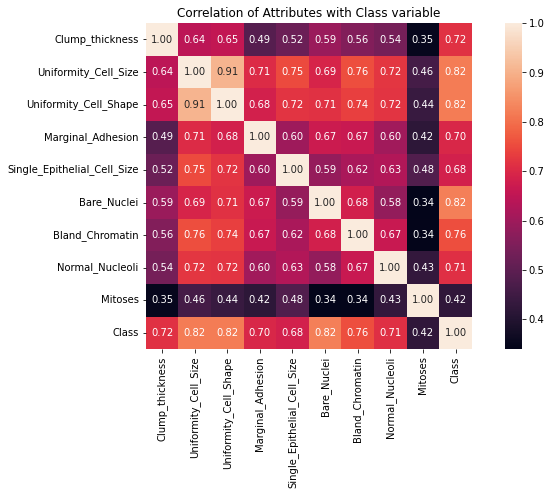

In [148]:
# Correlation Heat Map

plt.figure(figsize=(12,6))
plt.title('Correlation of Attributes with Class variable')
a = sns.heatmap(correlation, square=True, annot = True, fmt = ".2f", linecolor="white")
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=0)           
plt.show()


#### Interpretation
From the above correlation heat map, we can conclude that :

- Class is highly positive correlated with Uniformity_Cell_Size, Uniformity_Cell_Shape and Bare_Nuclei. (correlation coefficient = 0.82).

- Class is positively correlated with Clump_thickness(correlation coefficient=0.72), Marginal_Adhesion(correlation coefficient=0.70), Single_Epithelial_Cell_Size)(correlation coefficient = 0.68) and Normal_Nucleoli(correlation coefficient=0.71).

- Class is weekly positive correlated with Mitoses(correlation coefficient=0.42).

- The Mitoses variable is weekly positive correlated with all the other variables(correlation coefficient < 0.50)

## 3 ML Part

In [149]:
X = df.drop(["Class"], axis = 1)
Y = df["Class"]
# split X and y into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=42)


### 3.1 Feature Engineering

Feature Engineering is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. I will carry out feature engineering on different types of variables.

In [150]:
# check data types in X_train

X_train.dtypes

Clump_thickness                  int64
Uniformity_Cell_Size             int64
Uniformity_Cell_Shape            int64
Marginal_Adhesion                int64
Single_Epithelial_Cell_Size      int64
Bare_Nuclei                    float64
Bland_Chromatin                  int64
Normal_Nucleoli                  int64
Mitoses                          int64
dtype: object

Engineering missing values in variables

In [151]:
X_train.isnull().sum()


Clump_thickness                 0
Uniformity_Cell_Size            0
Uniformity_Cell_Shape           0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    11
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
dtype: int64

In [152]:
# check missing values in numerical variables in X_test

X_test.isnull().sum()

Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    5
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
dtype: int64

In [153]:
# print percentage of missing values in the numerical variables in training set

for col in X_train.columns:
    if X_train[col].isnull().mean()>0:
        print(col, round(X_train[col].isnull().mean(),4))

Bare_Nuclei 0.0197


#### Assumption

I assume that the data are missing completely at random (MCAR). There are two methods which can be used to impute missing values. One is mean or median imputation and other one is random sample imputation. When there are outliers in the dataset, we should use median imputation. So, I will use median imputation because median imputation is robust to outliers.

I will impute missing values with the appropriate statistical measures of the data, in this case median. Imputation should be done over the training set, and then propagated to the test set. It means that the statistical measures to be used to fill missing values both in train and test set, should be extracted from the train set only. This is to avoid overfitting.

In real-world problems, we never know the data from the future (test data) in advance.

- The model should work as if it "did not see" the test data before testing.
- By using the median only from the training set, we make gap filling the same as on real data.

In [154]:
X_train["Bare_Nuclei"].fillna(X_train["Bare_Nuclei"].median(), inplace = True)
X_test["Bare_Nuclei"].fillna(X_train["Bare_Nuclei"].median(), inplace = True)

print(X_train.dtypes)

print(X_train.isnull().sum())
print(X_test.isnull().sum())

Clump_thickness                  int64
Uniformity_Cell_Size             int64
Uniformity_Cell_Shape            int64
Marginal_Adhesion                int64
Single_Epithelial_Cell_Size      int64
Bare_Nuclei                    float64
Bland_Chromatin                  int64
Normal_Nucleoli                  int64
Mitoses                          int64
dtype: object
Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
dtype: int64
Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
dtype: int64


We now have training and testing set ready for model building. Before that, we should map all the feature variables onto the same scale. It is called feature scaling. I will do it as follows.

### 3.2 Feature Scaling

In [155]:
cols = X_train.columns

# Standardisation brings features to a common scale.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


In [156]:
X_train = pd.DataFrame(X_train, columns = [cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [157]:
X_train.head()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,0.164886,-0.383175,-0.760698,-0.642507,-0.554964,-0.698893,-0.183205,-0.601492,-0.349724
1,0.164886,-0.054655,-0.096276,0.405629,-0.554964,0.113334,-0.183205,0.392303,-0.349724
2,-1.236959,-0.711694,-0.760698,-0.293128,-0.554964,-0.698893,-0.183205,-0.601492,-0.349724
3,0.164886,-0.711694,-0.760698,-0.642507,-0.554964,-0.698893,-0.586401,-0.601492,-0.349724
4,-0.886498,-0.711694,-0.096276,-0.293128,-0.554964,-0.698893,-0.586401,-0.601492,-0.349724


### 3.3 Fit K Neighbours Classifier to the training eet

In [158]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=4)

In [159]:
y_pred = knn.predict(X_test)
y_pred

array([2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 4, 4, 2,
       4, 2, 4, 2, 2, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2,
       4, 4, 2, 2, 4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2,
       2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 4, 2, 2, 4,
       4, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 4, 4, 2, 2,
       4, 2, 4, 2, 4, 2, 2, 2], dtype=int64)

In [160]:
# probability of getting output as 2 - benign cancer

knn.predict_proba(X_test)[:,0]

array([1.  , 1.  , 1.  , 0.  , 1.  , 1.  , 0.75, 0.  , 0.  , 0.75, 1.  ,
       0.  , 1.  , 1.  , 1.  , 0.  , 1.  , 0.  , 0.  , 0.25, 0.  , 1.  ,
       0.  , 1.  , 0.  , 1.  , 1.  , 0.  , 1.  , 0.  , 1.  , 1.  , 1.  ,
       0.25, 1.  , 1.  , 1.  , 0.  , 1.  , 0.  , 1.  , 1.  , 0.  , 1.  ,
       1.  , 1.  , 1.  , 0.75, 1.  , 1.  , 1.  , 1.  , 0.  , 1.  , 0.5 ,
       1.  , 1.  , 0.  , 1.  , 1.  , 1.  , 1.  , 0.  , 1.  , 1.  , 1.  ,
       0.  , 0.  , 1.  , 1.  , 0.  , 1.  , 0.  , 1.  , 1.  , 1.  , 1.  ,
       0.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 0.  , 0.5 , 1.  ,
       1.  , 1.  , 1.  , 1.  , 0.  , 1.  , 1.  , 0.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 0.  , 0.  , 1.  , 0.  , 1.  , 1.  , 0.25,
       0.25, 1.  , 1.  , 0.25, 1.  , 0.25, 1.  , 1.  , 1.  , 1.  , 1.  ,
       0.  , 1.  , 1.  , 0.  , 0.25, 1.  , 1.  , 0.  , 0.  , 1.  , 1.  ,
       0.25, 1.  , 0.  , 1.  , 0.  , 1.  , 1.  , 1.  ])

In [161]:
# probability of getting output as 4 - malignant cancer

knn.predict_proba(X_test)[:,1]

array([0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.25, 1.  , 1.  , 0.25, 0.  ,
       1.  , 0.  , 0.  , 0.  , 1.  , 0.  , 1.  , 1.  , 0.75, 1.  , 0.  ,
       1.  , 0.  , 1.  , 0.  , 0.  , 1.  , 0.  , 1.  , 0.  , 0.  , 0.  ,
       0.75, 0.  , 0.  , 0.  , 1.  , 0.  , 1.  , 0.  , 0.  , 1.  , 0.  ,
       0.  , 0.  , 0.  , 0.25, 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.5 ,
       0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  ,
       1.  , 1.  , 0.  , 0.  , 1.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ,
       1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.5 , 0.  ,
       0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 1.  , 1.  , 0.  , 1.  , 0.  , 0.  , 0.75,
       0.75, 0.  , 0.  , 0.75, 0.  , 0.75, 0.  , 0.  , 0.  , 0.  , 0.  ,
       1.  , 0.  , 0.  , 1.  , 0.75, 0.  , 0.  , 1.  , 1.  , 0.  , 0.  ,
       0.75, 0.  , 1.  , 0.  , 1.  , 0.  , 0.  , 0.  ])

### 3.4 Check accuracy score

In [162]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))


Model accuracy score: 0.9714


Now, I will compare the train-set and test-set accuracy to check for overfitting.

In [163]:
y_pred_train = knn.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(Y_train, y_pred_train)))


Training-set accuracy score: 0.9678


Accuracy= Total number of predictions/Number of correct predictions


In [164]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(knn.score(X_train, Y_train)))
print('Test set score: {:.4f}'.format(knn.score(X_test, Y_test)))

Training set score: 0.9678
Test set score: 0.9714


The training-set accuracy score is 0.9821 while the test-set accuracy to be 0.9714. These two values are quite comparable. So, there is no question of overfitting.